In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read model pickle files
with open('model_rf.pickle', 'rb') as file:
    model_rf = pickle.load(file)
with open('model_gb.pickle', 'rb') as file:
    model_gb = pickle.load(file)
with open('model_xgb.pickle', 'rb') as file:
    model_xgb = pickle.load(file)
with open('model_dt.pickle', 'rb') as file:
    model_dt = pickle.load(file)
with open('model_ada.pickle', 'rb') as file:
    model_ada = pickle.load(file)

In [3]:
# get training and test data
X_train = pd.read_csv('X_train.csv')
X_train.index = X_train['Unnamed: 0']
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_train.index.name = ''

y_train = pd.read_csv('y_train.csv')
y_train.index = y_train['Unnamed: 0']
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_train.index.name = ''

X_test = pd.read_csv('X_test.csv')
X_test.index = X_test['Unnamed: 0']
X_test = X_test.drop(['Unnamed: 0'], axis=1)
X_test.index.name = ''

y_test = pd.read_csv('y_test.csv')
y_test.index = y_test['Unnamed: 0']
y_test = y_test.drop(['Unnamed: 0'], axis=1)
y_test.index.name = ''

I split the training set into train_sub set (70%) and validation set (30%), then plot ROC curve for each model type based on performance on the predefined validation set. By comparing AUC values, the model performance ranking is: Random Forest (AUC: 0.863) > Gradient Boosting (AUC: 0.856) > Bagging with XGBoost (AUC: 0.847) > Adaptive Boosting with Decision Tree (AUC: 0.846)  > Bagging with Decision Tree (AUC: 0.834).

Eventually, the best model was selected to be `RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=70)`. 

In [4]:
# split training set into train_sub set and validation set 
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

In [5]:
# save train_sub set and validation set 
X_train_sub.to_csv('X_train_sub.csv')
y_train_sub.to_csv('y_train_sub.csv')
X_val.to_csv('X_val.csv')
y_val.to_csv('y_val.csv')

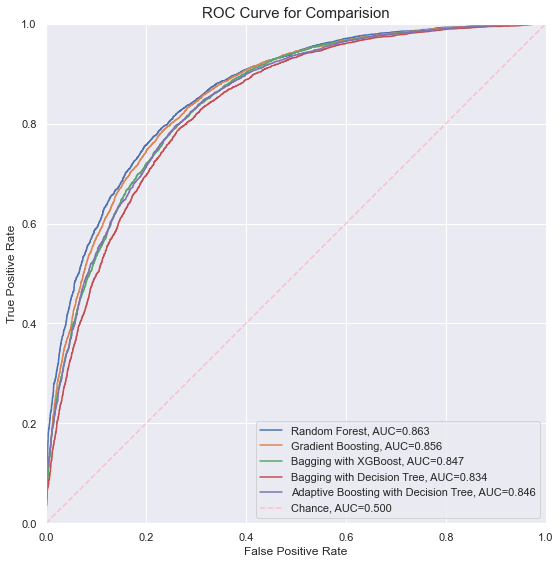

In [6]:
# prepare model
models = [model_rf, model_gb, model_xgb, model_dt, model_ada]
labels = ['Random Forest', 'Gradient Boosting', 'Bagging with XGBoost', 'Bagging with Decision Tree',
          'Adaptive Boosting with Decision Tree']

# initialize plot
plt.figure(figsize=(16,8))

# plot ROC curve
for i, model in enumerate(models):
    scores = model.predict_proba(X_val)[:,1]
    fpr, tpr, _ = roc_curve(y_val, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=labels[i] + ', AUC={:.3f}'.format(roc_auc))
    
# plot the chance diagonal 
plt.plot((0,1),(0,1),color='pink', linestyle='--', label='Chance, AUC=0.500')

# add elements to plot
plt.axis('square')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Comparision', fontsize=15)
plt.legend()

# show plot
plt.tight_layout()
plt.show()

In [7]:
# pickle best model out
best_model = model_rf
with open('best_model.pickle', 'wb') as file:
    pickle.dump(best_model, file)